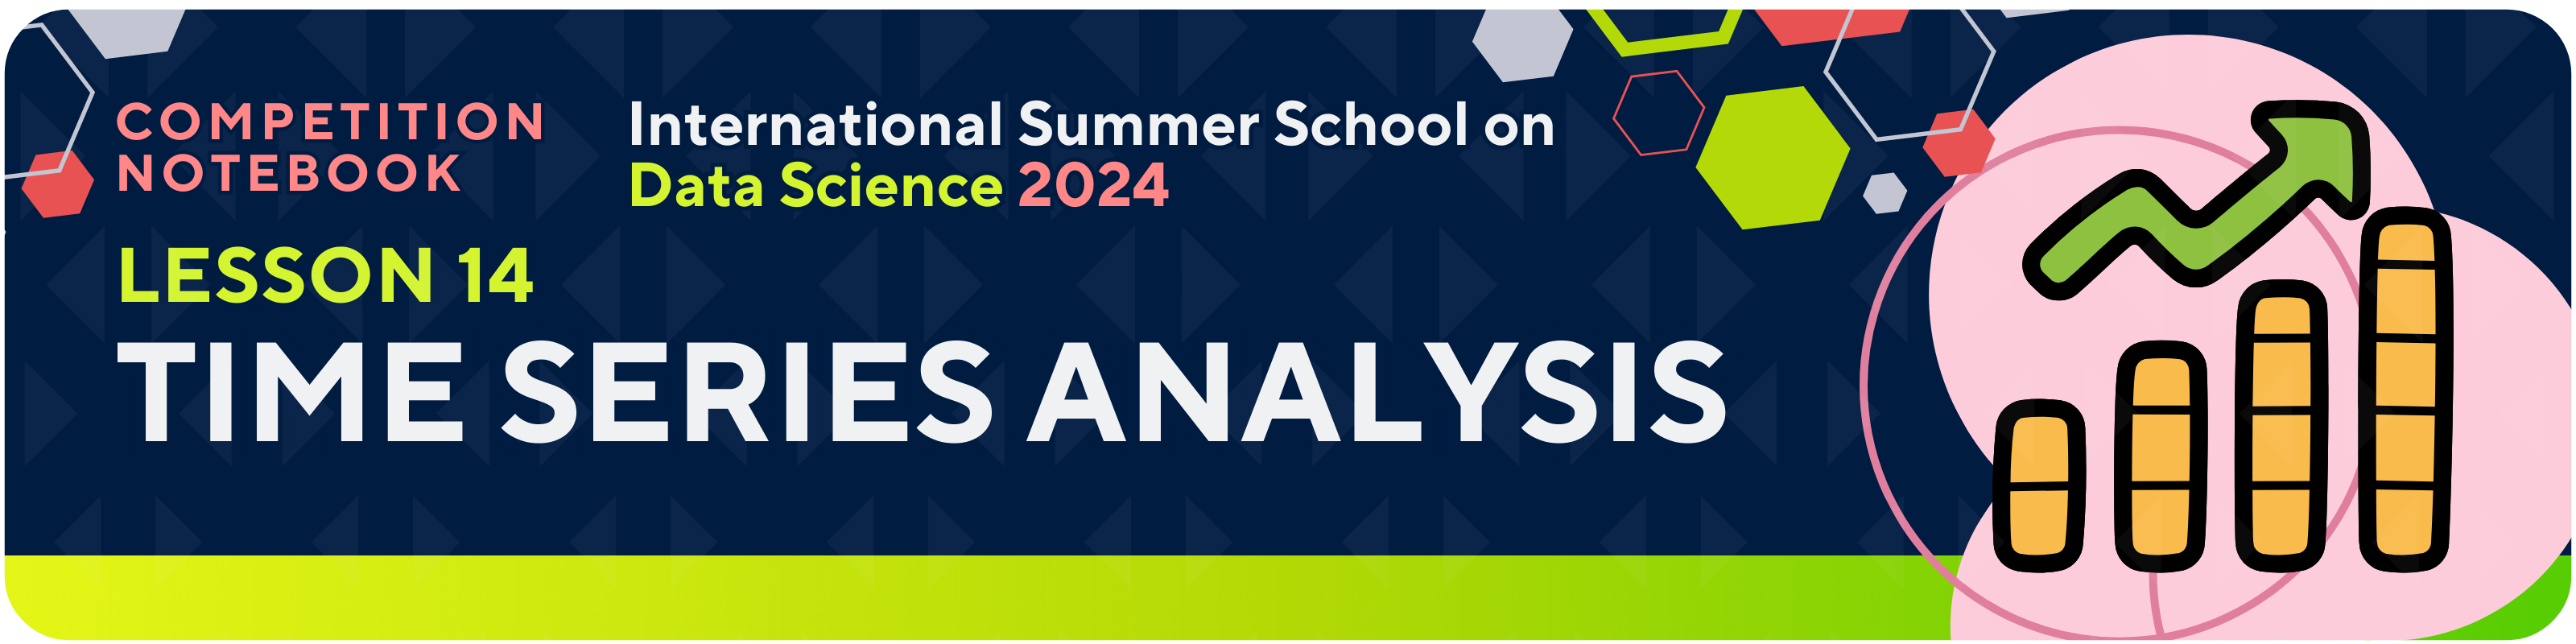

## **🎯      Goal**

Your goal is to **predict the stock price of the second half of 2020.**<br><br>

<img src="https://i.imgur.com/dSxPegv.png" width=800 />



## **1**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Import Libraries**


In [ ]:
# Basic Libraries
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy  as np
import random
import warnings
warnings.filterwarnings('ignore')

# Data Preprocessing
from sklearn.preprocessing   import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics         import accuracy_score, mean_squared_error, r2_score

# Time Series Analysis
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing

## **2**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Load the Training Set**


In [ ]:
train_url = "https://www.dropbox.com/scl/fi/eebbekvkh2u5fhjtz3tq9/train.csv?rlkey=890itdgu5dokh22padrn3zqkx&st=1jfcyw7e&dl=0&raw=1"
df_train = pd.read_csv(train_url, index_col=0, parse_dates=True)

test_url = "https://www.dropbox.com/scl/fi/q4uaq96hrtk1wx84bph6m/test.csv?rlkey=0z7wt9ab3c931x3ihhp20mzud&st=g246yeew&dl=0&raw=1"
df_test = pd.read_csv(test_url, index_col=0, parse_dates=True)

target_col = 'price'

# Concatenate train and test
df = pd.concat([df_train, df_test.assign(price=np.nan)])

df

,price,volume,market_index,sector_index,interest_rate,volatility_index
date,,,,,,
2015-01-01,101.50,26843.0,1013.19,494.29,2.42,20.00
2015-01-02,106.45,129512.0,1019.63,502.75,2.43,22.45
2015-01-03,110.53,453625.0,1002.12,499.04,2.35,20.53
2015-01-04,111.30,237218.0,1002.38,501.99,2.58,19.50
2015-01-05,113.48,19130.0,989.30,508.82,2.42,20.27
...,...,...,...,...,...,...
2020-12-25,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-26,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-27,NaN,NaN,NaN,NaN,NaN,NaN



## **3**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Set Feature Matrix & Target Variable**



In [ ]:
# Check the number of test data
horizon = df_test.shape[0]
X_train = df[target_col][:-horizon]
X_test = df[target_col][-horizon:]

## **4**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Explore the Data**

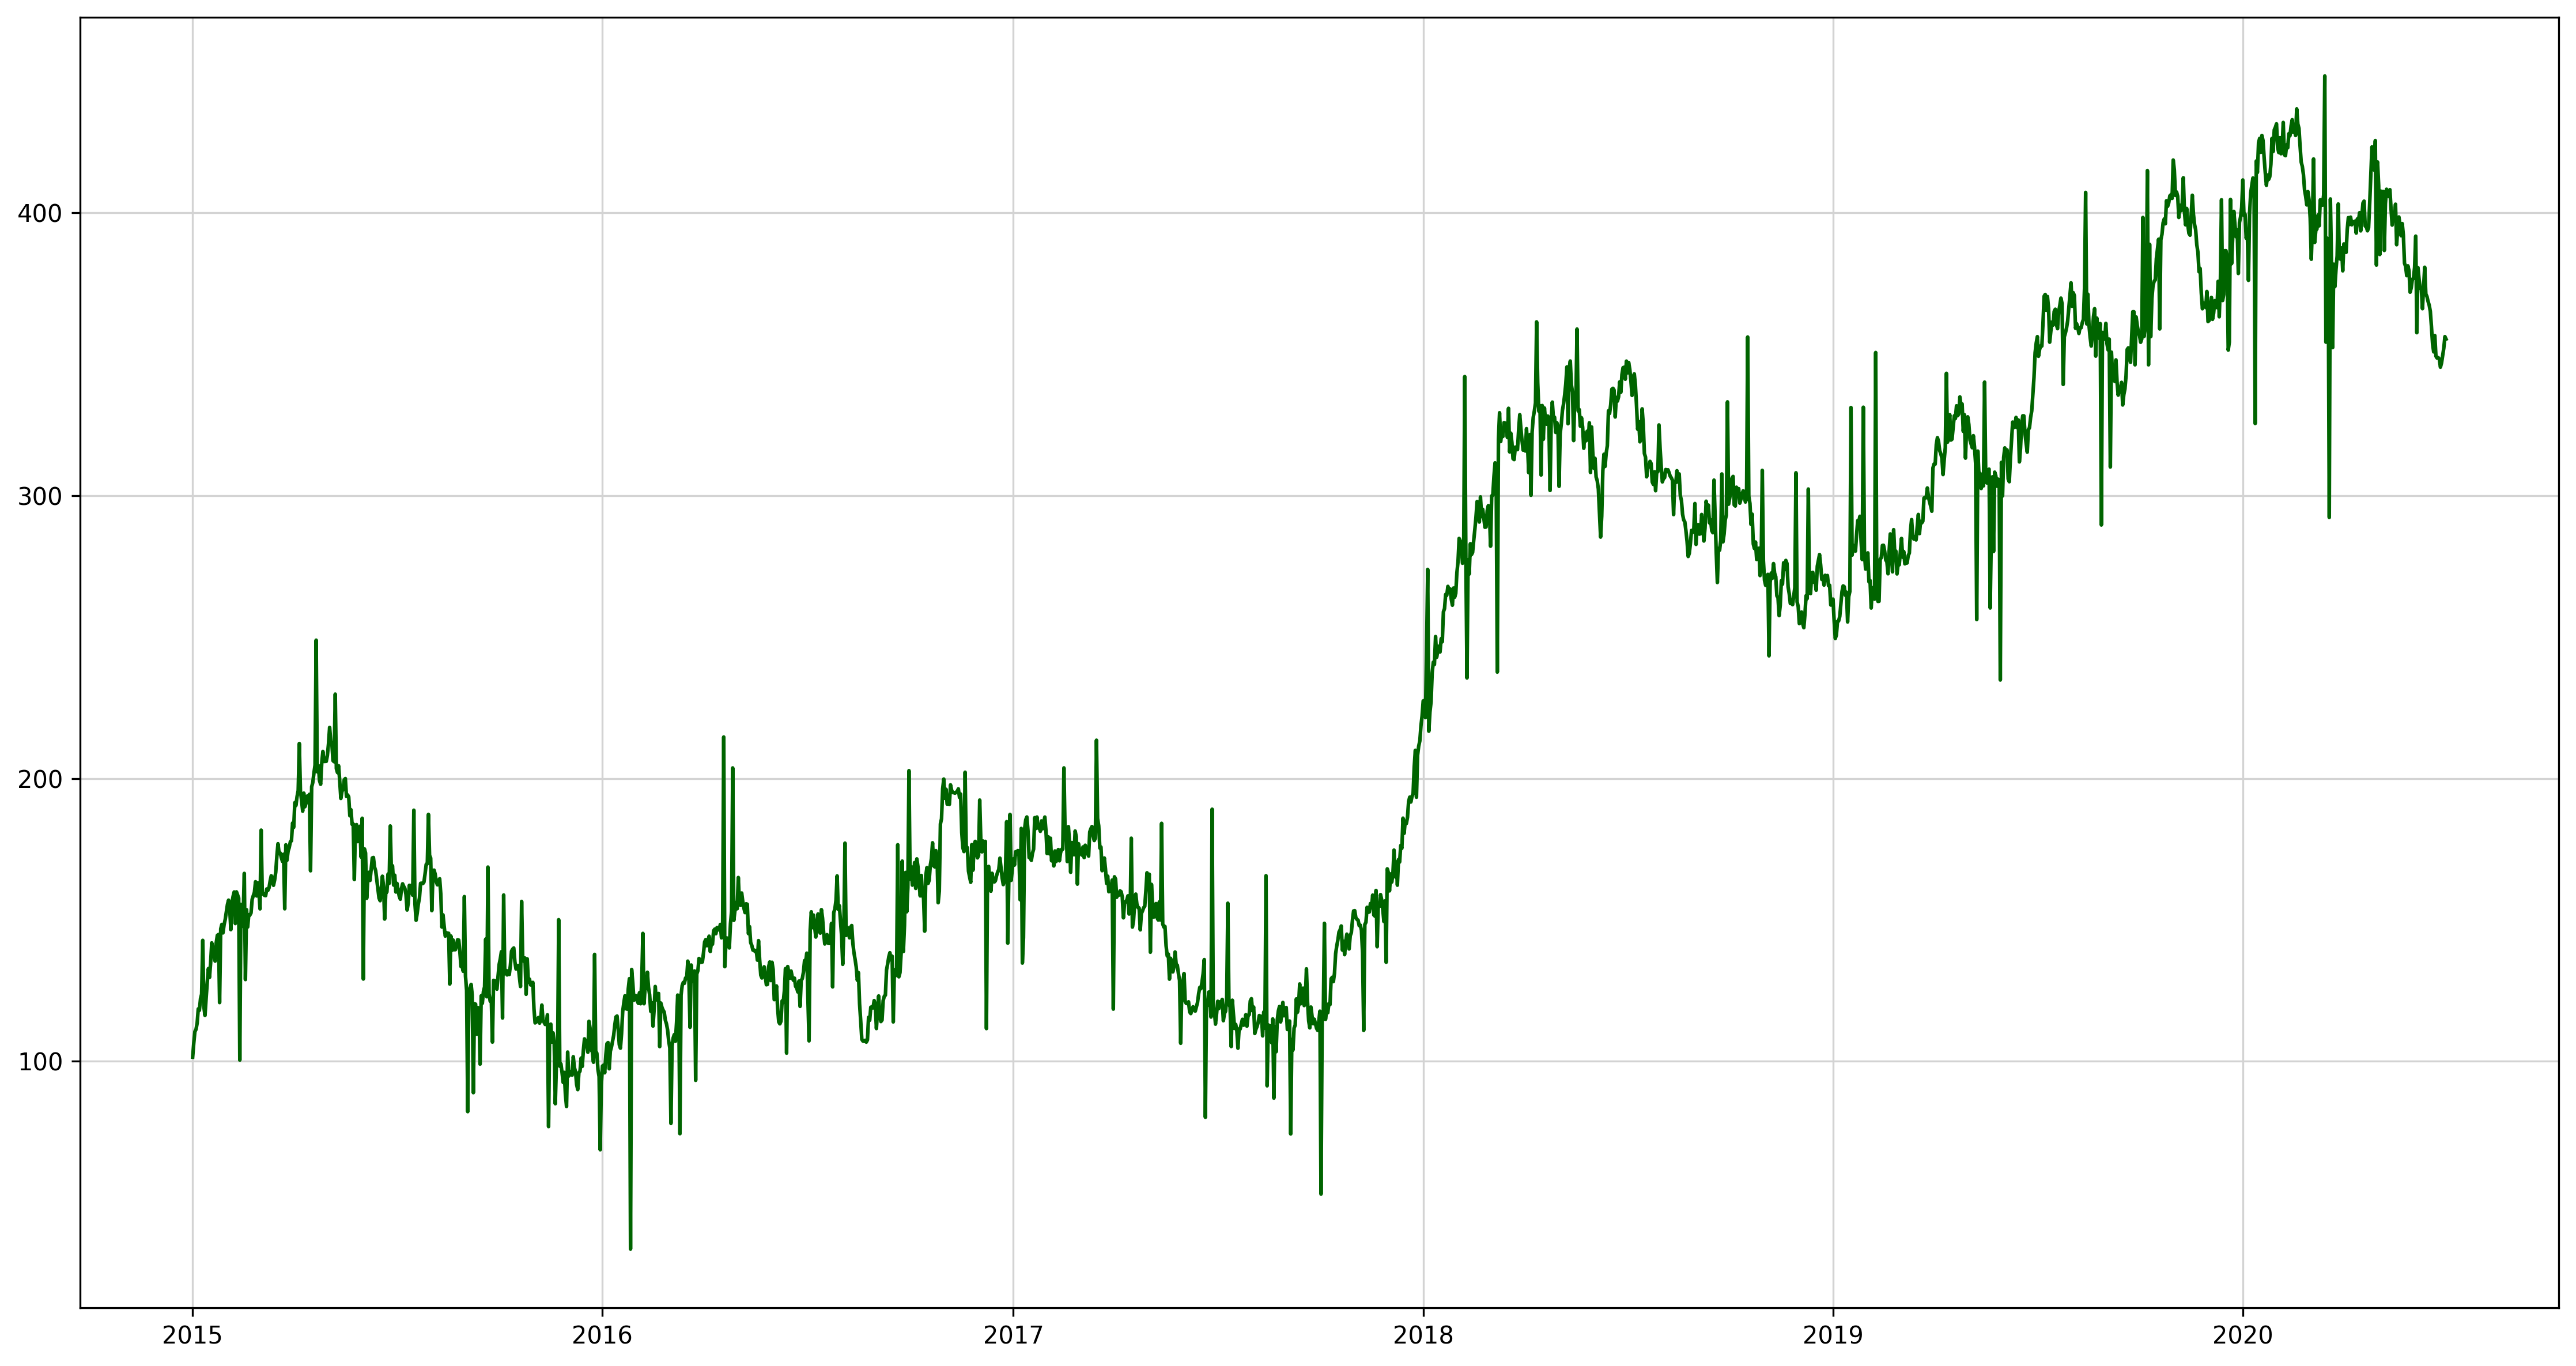

In [ ]:
# Plotting the time series
plt.figure(figsize=(15, 8), dpi=300)
plt.plot(df.index, df[target_col], color='darkgreen')

# Make the grid light grey
plt.grid(color='lightgrey')
plt.xlabel('')
plt.ylabel('')
plt.grid(True)
plt.tight_layout()  # Adjust layout for better fit
plt.show()

## **5**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Perform Preprocessing**



## **6**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Make Prediction Model**



In [ ]:
model = ARIMA(X_train, order=(7, 1, 2))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)



## **7**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Tune Hyperparameters**




## **8**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Fit the Model**



In [ ]:
# Fit the model
fitted_model = model.fit()


## **9**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Make Prediction**



In [ ]:
# Forecast the next 30 points
forecast = fitted_model.forecast(steps=horizon)

# Print the forecast
print(forecast)

2020-07-01    352.366941
2020-07-02    352.605694
2020-07-03    352.372825
2020-07-04    352.324232
2020-07-05    352.547749
                 ...    
2020-12-25    352.718020
2020-12-26    352.718020
2020-12-27    352.718020
2020-12-28    352.718020
2020-12-29    352.718020
Freq: D, Name: predicted_mean, Length: 182, dtype: float64


### Visualize forecasting result

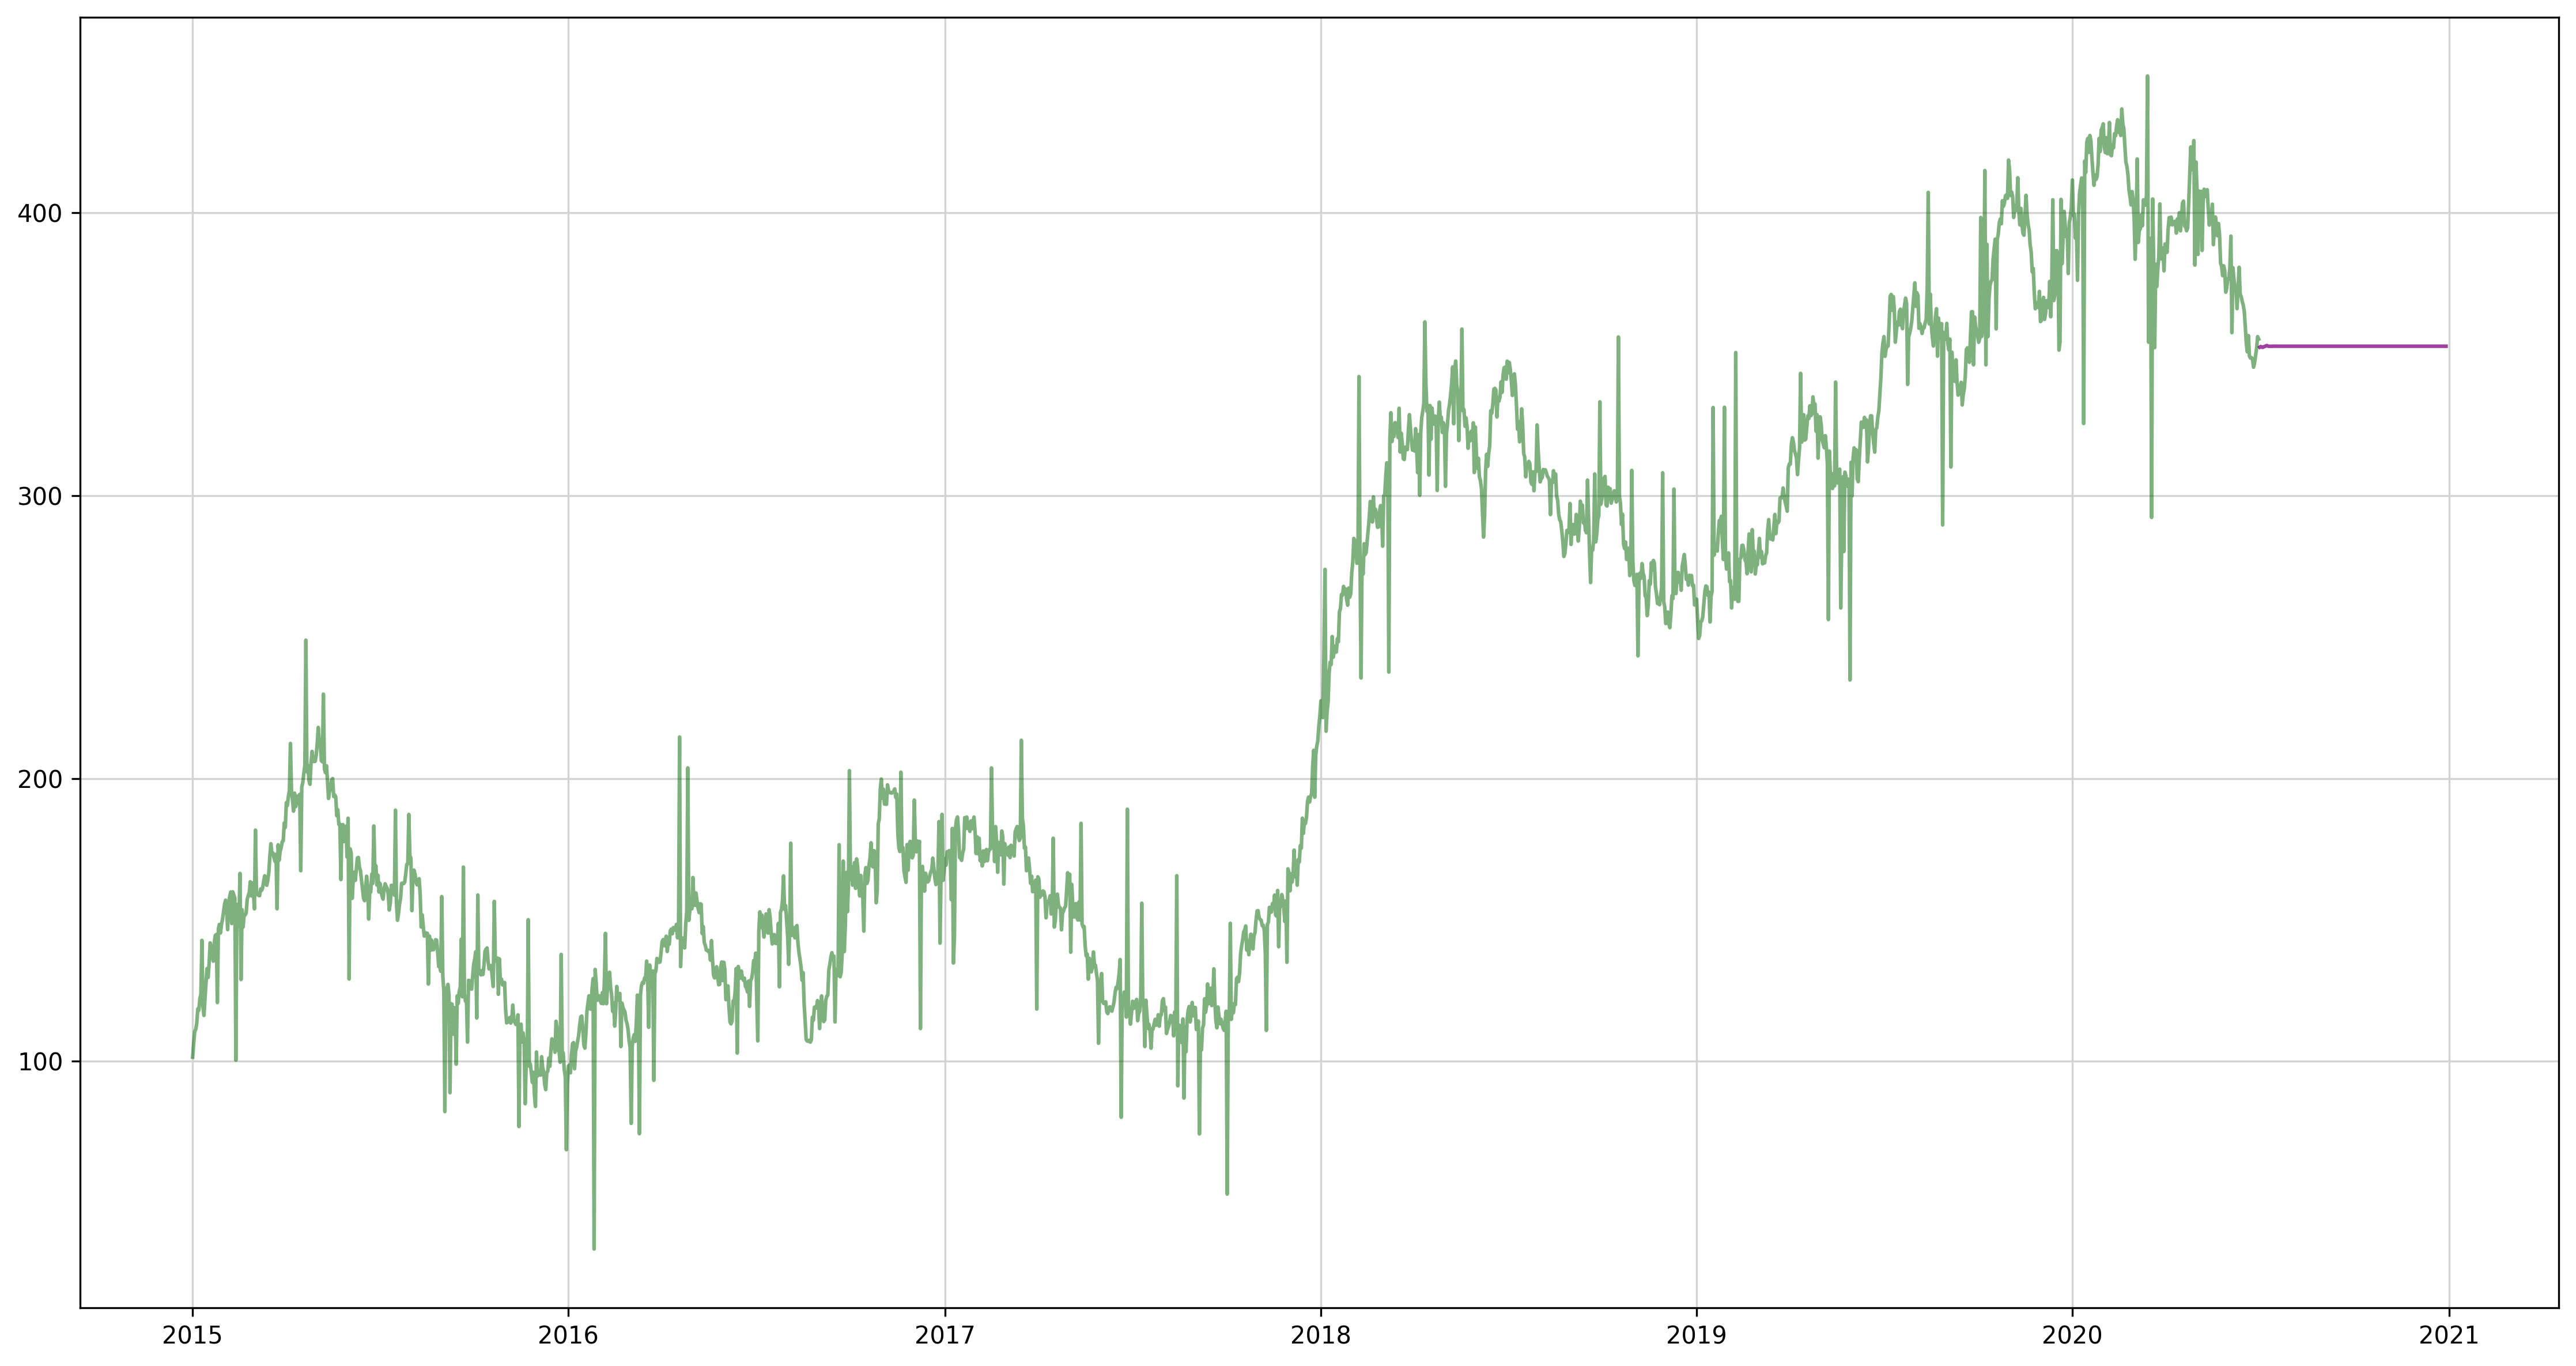

In [ ]:
import matplotlib.pyplot as plt

# Plotting the time series
plt.figure(figsize=(15, 8), dpi=300)
plt.plot(X_train, label='Training Data', color='darkgreen', alpha=0.5)
plt.plot(X_test.index, X_test, label='Test Data', color='darkgreen', alpha=0.5)

# Plot the forecasted data
plt.plot(X_test.index, forecast, label='Forecast', color='purple', alpha=0.75)

# Make the grid light grey
plt.grid(color='lightgrey')
plt.xlabel('')
plt.ylabel('')
plt.grid(True)
plt.tight_layout()  # Adjust layout for better fit
plt.show()


## **10**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Create Submission File**


In [ ]:
# Make DataFrame for Submission
submission = pd.DataFrame(forecast.values, index=df_test.index, columns=[target_col])

# Make a CSV file for Submission
submission.to_csv('submission.csv')

submission

,price
date,
2020-07-01,352.366941
2020-07-02,352.605694
2020-07-03,352.372825
2020-07-04,352.324232
2020-07-05,352.547749
...,...
2020-12-25,352.718020
2020-12-26,352.718020
2020-12-27,352.718020


## <font color="#B8D71D">▝</font><font color="#707DA0">▖   </font>**Download File**

In [ ]:
from google.colab import files
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>